neccessary imports:


In [2]:
#code obtained from https://github.com/samiamkhan/4641Project

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
#import chess

code for main:

In [17]:
def dataLoader(x):
    data = pd.read_csv(x)
    return data

main:

In [11]:
f = "games.csv"
data = dataLoader("games.csv")
header = data.head
df = pd.DataFrame(data)

#create a two-dimensional 
slctCol = df[['victory_status', 'winner', 'white_rating', 'black_rating', 'moves', 'opening_eco','opening_name', 'opening_ply']]
slctCol = slctCol[(slctCol['victory_status'] == 'mate') | (slctCol['victory_status'] == 'resign')]

#Convert to numpy NDArray (very useful)
npData = data.to_numpy()

'''
trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance
'''

#print("Training Shape: ", trainingData.shape)
#print("Testing Shape: ", testingData.shape)

'''
These are some notes about Standard Chess Notation for referencing moves. The board is 8x8, with the bottom left corner
being A1 and the top right being H8. The top left corner would be A8 and the bottom right corner would be H1. Using the
Python chess library to interpret moves to prevent manual checking and parsing: https://pypi.org/project/python-chess/
'''

#print(data.iloc[3]) # show third rowrow

firstOneDict = {}
firstTwoDict = {}
firstThreeDict = {}
firstXDict = {}

for sampleIndex in range(len(npData)):
    moves = npData[sampleIndex][12] # 12 is the column index for the moves data
    movesList = moves.split()       # creates separate strings for each move, within an array

    firstOne = " ".join(movesList[0:2])   # Moves 0 for both players in space-separated string
    firstTwo = " ".join(movesList[0:4])   # Moves 0, 1 for both players in space-separated string
    firstThree = " ".join(movesList[0:6]) # Moves 0, 1, 2 for both players in space-separated string
    firstX = " ".join(movesList[0:4])     # X Moves for each player in space-separated string (replace the 4)

    # build a dictionary of unique moves
    if firstOne in firstOneDict.keys():
        firstOneDict[firstOne].append(sampleIndex)
    else:
        firstOneDict[firstOne] = [sampleIndex]
    
    if firstTwo in firstTwoDict.keys():
        firstTwoDict[firstTwo].append(sampleIndex)
    else:
        firstTwoDict[firstTwo] = [sampleIndex]

    if firstThree in firstThreeDict.keys():
        firstThreeDict[firstThree].append(sampleIndex)
    else:
        firstThreeDict[firstX] = [sampleIndex]
        
    if firstX in firstXDict.keys():
        firstXDict[firstX].append(sampleIndex)
    else:
        firstXDict[firstX] = [sampleIndex]

#print("One keys: ", len(firstOneDict.keys()))
#print("Two keys: ", len(firstTwoDict.keys()))
#print("Three keys: ", len(firstThreeDict.keys()))

---- START OF ONE DICT ----
end of one
Accuracy: 0.5545722713864307
---- START OF TWO DICT ----
end of two
Accuracy: 0.543755912961211
---- START OF THREE DICT ----
end of three
Accuracy: 0.8115942028985508


In [23]:
#run the simple case of predicting winner based on ratings of black and white and two moves

print("---- START OF ONE DICT ----")

yCforCompareOne = np.empty(0)
yPforCompareOne = np.empty(0)

for key in firstOneDict.keys():
    
    if len(firstOneDict[key]) >= 2:

        #use the first 80% of games as the training data set
        trainingIndices = firstOneDict[key][0:(int)(len(firstOneDict[key]) * 0.8)]
        #use the last 20% of games as the testing data set
        testingIndices  = firstOneDict[key][len(trainingIndices):len(firstOneDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance

        #print("Key: ", key)
        indices = firstOneDict[key]

        #initialize the memory spaces for arrays
        xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        
        #fill the two arrays
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # additional 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareOne = np.append(yCforCompareOne,yTestingCorrect)
        yPforCompareOne = np.append(yPforCompareOne,yTestingPredictions)
        
        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))

print("Accuracy:", metrics.accuracy_score(yCforCompareOne, yPforCompareOne))

print("---- END OF ONE DICT ----")

---- START OF ONE DICT ----
Accuracy: 0.553834808259587
---- END OF ONE DICT ----


In [19]:
#run the case of predicting winner based on ratings of black and white and four moves

print("---- START OF TWO DICT ----")

yCforCompareTwo = np.empty(0)
yPforCompareTwo = np.empty(0)

for key in firstTwoDict.keys():
    
    #print("Key Length: ", len(firstTwoDict[key]))
    
    if len(firstTwoDict[key]) >= 2:

        trainingIndices = firstTwoDict[key][0:(int)(len(firstTwoDict[key]) * 0.8)]
        testingIndices = firstTwoDict[key][len(trainingIndices):len(firstTwoDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance

        #print("Key: ", key)
        indices = firstTwoDict[key]

        xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # additional 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareTwo = np.append(yCforCompareTwo, yTestingCorrect)
        yPforCompareTwo = np.append(yPforCompareTwo, yTestingPredictions)

        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))
    else:
        None
        #print(' ')
        #print("Skipping key due to insufficient data.")

print("Accuracy:", metrics.accuracy_score(yCforCompareTwo, yPforCompareTwo))

print("---- END OF TWO DICT ----")

---- START OF TWO DICT ----
Accuracy: 0.5413907284768212
---- END OF TWO DICT ----


In [25]:
#run the case of predicting winner based on ratings of black and white and six moves

print("---- START OF THREE DICT ----")

yCforCompareThree = np.empty(0)
yPforCompareThree = np.empty(0)
numkey = 0
for key in firstThreeDict.keys():
    
    #print("Key Length: ", len(firstThreeDict[key]))
    
    if len(firstThreeDict[key]) >= 2:
        numkey = numkey + 1

        trainingIndices = firstThreeDict[key][0:(int)(len(firstThreeDict[key]) * 0.8)]
        testingIndices = firstThreeDict[key][len(trainingIndices):len(firstThreeDict[key])]

        #trainingData = npData[0:(int)(npData.shape[0] * 0.8)]
        #testingData = npData[len(trainingData): len(npData)] # Don't touch this until we're testing our performance

        #print("Key: ", key)
        indices = firstThreeDict[key]

        xTraining = np.empty((len(trainingIndices), 2)) # additional 2 for p1Rating and p2Rating
        yTraining = np.empty(len(trainingIndices), dtype=object) # Winner

        count = 0
        for index in trainingIndices:
            curr = npData[index]

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTraining[count][0] = p1Rating
            xTraining[count][1] = p2Rating
            yTraining[count] = winner

            count += 1

        classifier = DecisionTreeClassifier()
        classifier.fit(xTraining, yTraining)

        ##### TESTING #####

        xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
        yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner

        count = 0

        for index in testingIndices:
            curr = npData[index]

            #print("Curr: ", curr)

            p1Rating = curr[9]
            p2Rating = curr[11]
            winner = curr[6]

            xTesting[count][0] = p1Rating
            xTesting[count][1] = p2Rating
            yTestingCorrect[count] = winner

            count += 1

        yTestingPredictions = classifier.predict(xTesting)
        
        yCforCompareThree = np.append(yCforCompareThree, yTestingCorrect)
        yPforCompareThree = np.append(yPforCompareThree, yTestingPredictions)

        #print(confusion_matrix(yTestingCorrect, yTestingPredictions))
        #print(classification_report(yTestingCorrect, yTestingPredictions))
    else:
        None
        #print("Skipping key due to insufficient data.")

#print("numkey",numkey)

print("Accuracy:", metrics.accuracy_score(yCforCompareThree, yPforCompareThree))

print("---- END OF THREE DICT ----")

---- START OF THREE DICT ----
Accuracy: 0.8405797101449275
---- END OF THREE DICT ----


if key length is greater than 250, you can see which are the top 10 popular openings for the first 2 moves of each player (so firstTwo, meaning 0:4)
if you look at first Seven, you can see the accuracy goes up to 90%.

In [26]:
def keyAndOpening(keyLength, numMoves, mode):
    firstXDict = {}
    for sampleIndex in range(len(npData)):
        moves = npData[sampleIndex][12] # 12 is the index for the moves
        movesList = moves.split()
        firstX = " ".join(movesList[0:numMoves*2]) # X Movesfor each player in space-separated string
        if firstX in firstXDict.keys():
            firstXDict[firstX].append(sampleIndex)
        else:
            firstXDict[firstX] = [sampleIndex]
    yCforCompareX = np.empty(0)
    yPforCompareX = np.empty(0)
    numkey = 0
    for key in firstXDict.keys():
        if len(firstXDict[key]) >= keyLength:
                numkey = numkey + 1
                trainingIndices = firstXDict[key][0:(int)(len(firstXDict[key]) * 0.8)]
                testingIndices = firstXDict[key][len(trainingIndices):len(firstXDict[key])]
                indices = firstXDict[key]
                xTraining = np.empty((len(trainingIndices), 2)) # 2 for p1Rating and p2Rating
                yTraining = np.empty(len(trainingIndices), dtype=object) # Winner
                count = 0
                for index in trainingIndices:
                    curr = npData[index]
                    p1Rating = curr[9]
                    p2Rating = curr[11]
                    winner = curr[6]
                    xTraining[count][0] = p1Rating
                    xTraining[count][1] = p2Rating
                    yTraining[count] = winner
                    count += 1
                classifier = DecisionTreeClassifier()
                classifier.fit(xTraining, yTraining)
                
                ##### TESTING #####
                
                xTesting = np.empty((len(testingIndices), 2)) # 2 for p1Rating and p2Rating
                yTestingCorrect = np.empty(len(testingIndices), dtype=object) # Winner
                count = 0
                for index in testingIndices:
                    curr = npData[index]
                    #print("Curr: ", curr)
                    p1Rating = curr[9]
                    p2Rating = curr[11]
                    winner = curr[6]
                    xTesting[count][0] = p1Rating
                    xTesting[count][1] = p2Rating
                    yTestingCorrect[count] = winner
                    count += 1
                yTestingPredictions = classifier.predict(xTesting)
                yCforCompareX = np.append(yCforCompareX,yTestingCorrect)
                yPforCompareX = np.append(yPforCompareX,yTestingPredictions)
         
        else:
            None
    score = 0
    if mode == 0 or mode == None:
        #print("accuracy")
        score = metrics.accuracy_score(yCforCompareX, yPforCompareX)
    elif mode == 1:
        #print("precision, micro")
        score = metrics.precision_score(yCforCompareX, yPforCompareX, average = "micro")
    else:
        #print("recall micro")
        score = metrics.recall_score(yCforCompareX, yPforCompareX, average = "micro")

    return (numkey, score)


In [33]:
ans = keyAndOpening(1000, 2, 0) # param 1 = keyLength is number of instance per move param 2 = number moves in opening
print("numkey", ans[0])
print("Accuracy", ans[1])

numkey 1
Accuracy 0.5489130434782609


Accuracy graph as the opening length increases:


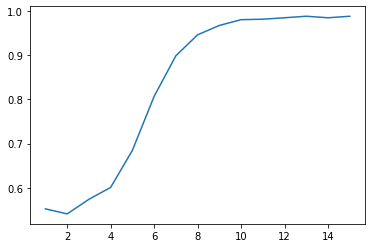

In [35]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,16):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,0)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("Accuracy graph as the opening length increases:")

Precision graph as the opening length increases:


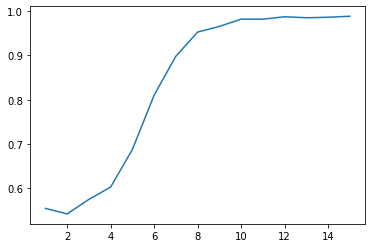

In [36]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,16):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,1)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("Precision graph as the opening length increases:")

Recall graph as the opening length increases:


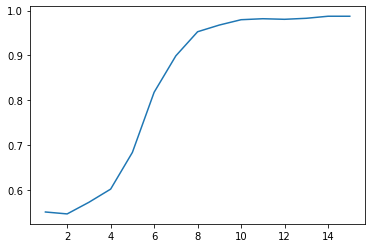

In [37]:
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,16):
    graphX = np.append(graphX,i)
    tup = keyAndOpening(2,i,2)
    numkey = tup[0]
    Acc = tup[1]
    graphY = np.append(graphY,Acc)
plt.plot(graphX, graphY)
plt.show
print("Recall graph as the opening length increases:")